In [0]:
# For division
from __future__ import division
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt

%matplotlib inline

# For reading stock data from yahoo
import pandas_datareader as web

# For time stamps

from datetime import datetime,date,timedelta

In [0]:
#from google.colab import files
#uploaded = files.upload()


In [0]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['train_csv.csv']))[['feature']]
base = date(2019, 4, 1)
date =  pd.DataFrame([base + timedelta(days=x) for x in range(80)], columns=['date'])

(80, 2)


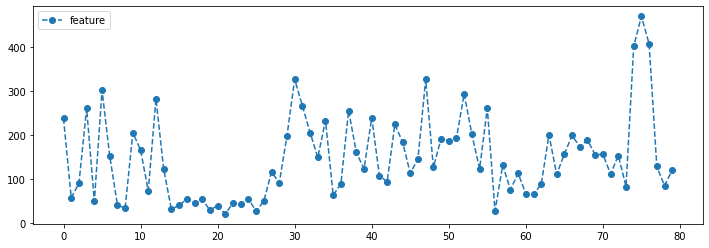

In [101]:
df2 = pd.concat([date, df2], axis=1)
print(df2.shape)
df2.plot(figsize=(12,4),legend=True, linestyle='--', marker='o')

In [0]:
df2.describe()
df =df2
df = df.reset_index()
df[['ds','y']] = df[['date' ,'feature']]
df = df[['ds','y']]

In [103]:
import fbprophet
m = fbprophet.Prophet(yearly_seasonality=False, weekly_seasonality='auto', daily_seasonality='auto')
m.fit(df)
future = m.make_future_dataframe(periods=40)
future = future.reset_index(inplace=False)
future[['ds']] = future[['ds']]
forecast = m.predict(future)
forecast = forecast[['ds','yhat_lower','yhat','yhat_upper']]
print(forecast.head())

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds  yhat_lower        yhat  yhat_upper
0 2019-04-01  -44.003431   64.336176  178.613865
1 2019-04-02  -51.621642   66.919015  176.647436
2 2019-04-03   -5.646269  112.531118  223.918800
3 2019-04-04    1.673542  121.077358  234.213637
4 2019-04-05   -7.139137   99.523796  209.880917


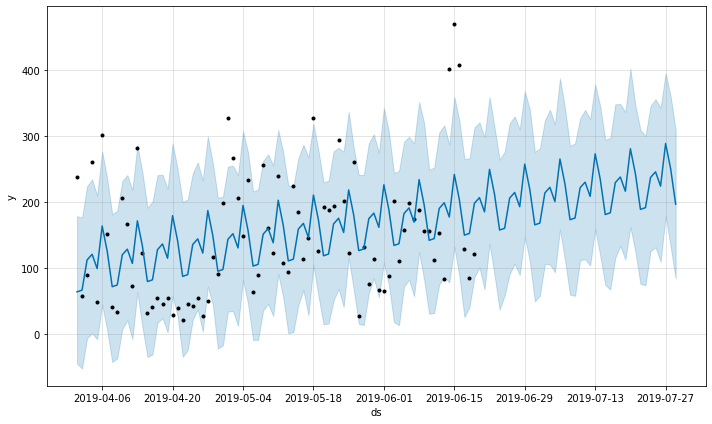

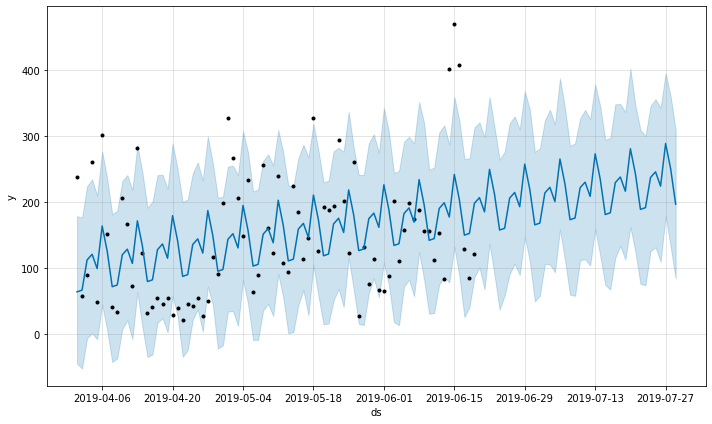

In [104]:
m.plot(forecast)
#m.plot_components(forecast)

In [0]:
test = pd.read_csv(io.BytesIO(uploaded['test_csv.csv']))[['time']]
predicted = forecast.tail(40)
predicted.reset_index(inplace=True)
predicted = predicted[['yhat_lower','yhat','yhat_upper']]
test_data = pd.concat([test,predicted], axis=1)
test_data.to_csv('test_predicted.csv')